## Импортируем необходимые библиотеки.

In [660]:
# Имнор библиотек 
import pandas as pd
import numpy as np

# Импорт библиотек для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

### Описание входных данных

- ID объявления
- Количество комнат 
- Тип 
- Метро 
- Адрес
- Площадь в м^2
- Дом 
- Парковка 
- Цена 
- Телефоны 
- Описание 
- Ремонт 
- Плозадь комнат, м^2
- Балкон 
- Окна
- Санузел 
- Можно с детьми/животными 
- Дополнительно 
- Название ЖК
- Серия дома 
- Высота потолка, м
- Лифт 
- Мусоропровод 
- Ссылка на объявление 

### ***Цена - таргетный признак***
-----------------------------------------------------------------------------------------------------------------------------

## Прочитаем датасет в переменную.

In [661]:
df = pd.read_csv('cian_dataset.csv')
pd.options.display.max_columns = None

## Проанализируем датасет.

In [662]:
df.head(3)

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086


In [663]:
# Информация о типах данных и пропущенных значениях
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23368 entries, 0 to 23367
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                23368 non-null  int64  
 1   ID  объявления            23368 non-null  int64  
 2   Количество комнат         22327 non-null  object 
 3   Тип                       23368 non-null  object 
 4   Метро                     22053 non-null  object 
 5   Адрес                     23368 non-null  object 
 6   Площадь, м2               23368 non-null  object 
 7   Дом                       23368 non-null  object 
 8   Парковка                  9951 non-null   object 
 9   Цена                      23368 non-null  object 
 10  Телефоны                  23368 non-null  object 
 11  Описание                  23368 non-null  object 
 12  Ремонт                    20613 non-null  object 
 13  Площадь комнат, м2        14458 non-null  object 
 14  Балкон

## Выберем только московские квартиры

In [664]:
df['Адрес'] = df['Адрес'].apply(lambda x: x if 'Москва' in x else np.nan)
df.dropna(subset=['Адрес'], inplace=True)

### Проанализируем данные на наличие пропусков

In [665]:
# Посмотрим на процентное содержание пропусков в каждой колонке и построим тепловую карту пропусков
null_data = df.isna().mean() * 100
print(null_data[null_data > 0].sort_values(ascending=False))
print(f"""\n Видим, что у признаков Парковка, Площадь комнаты, Балков, название ЖК, серия дома, высота потолков, мусоропровод 
      больше 30%, дополнение пропусков может сильно исказить данные, поэтому предположительно эти признаки можно удалить """)

Серия дома                  89.405685
Название ЖК                 77.423114
Парковка                    56.614480
Высота потолков, м          46.623094
Мусоропровод                40.568475
Площадь комнат, м2          36.621574
Балкон                      33.591731
Окна                        26.093125
Можно с детьми/животными    24.902467
Лифт                        21.239297
Ремонт                      12.479100
Санузел                     10.340984
Количество комнат            2.710645
Метро                        1.753053
Дополнительно                1.378122
dtype: float64

 Видим, что у признаков Парковка, Площадь комнаты, Балков, название ЖК, серия дома, высота потолков, мусоропровод 
      больше 30%, дополнение пропусков может сильно исказить данные, поэтому предположительно эти признаки можно удалить 


Видим, что пропуски коррелируют между собой, более того есть строки в которых не менее трех пропусков


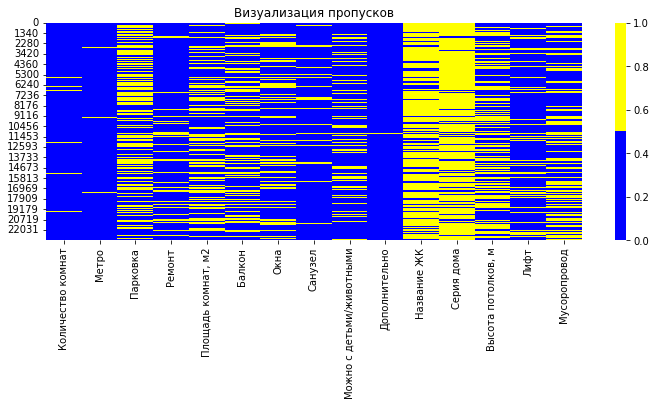

In [666]:
# Построим тепловую карту, чтобы оуенить разброс пропусков
colors = ['blue', 'yellow'] 
cols = null_data[null_data > 0].index
plt.figure(figsize=(12, 4))
ax = sns.heatmap(
    df[cols].isnull(),
    cmap=sns.color_palette(colors)
)
ax.set_title('Визуализация пропусков')
print(f'Видим, что пропуски коррелируют между собой, более того есть строки в которых не менее трех пропусков')

In [667]:
# Удалим признаки с большим количестовм пропусков
from dataclasses import replace


df.drop(columns=['Название ЖК', 'Серия дома', 'Площадь комнат, м2','Высота потолков, м', 'Мусоропровод', 'Балкон'], axis=1, inplace=True)

# Удалим строки, где есть три пропуска
df = df.dropna(thresh=df.shape[1]-3, axis=0)

#### Дополним пропуски

In [668]:
# Признак Парковка - дополним используя одинаковые адреса

mask = df['Парковка'].isnull()
addresses_with_parking = df[~ mask]['Адрес'].unique().tolist() # Найдем найдем адреса, у которых указана парковка
df_with_parking = df[~ mask]

# Функция для получения значения парковки
def get_parking(x):
    if (x['Парковка'] is np.nan) and (x['Адрес'] in addresses_with_parking):
        return df_with_parking[df_with_parking['Адрес'] == x['Адрес']]['Парковка'].values[0]
    else:
        return x['Парковка']
    
# Применем функцию к датасету
df['Парковка'] = df.apply(lambda x: get_parking(x), axis=1)

# Пропусков стало меньше
print(f"Количество пропусков: {df['Парковка'].isnull().mean() * 100}")

# Оставшиеся пропуски заменим тем, что парковки нет
df.loc[df['Парковка'].isnull(), 'Парковка'] = 'нет'

Количество пропусков: 32.2966375953047


In [669]:
# Для признака Можно с детьми/животными заполнем модой
df['Можно с детьми/животными'] = df['Можно с детьми/животными'].fillna(df['Можно с детьми/животными'].mode().values[0])

# Для признака Окна заполним пропуски медианным значением
df['Окна'] = df['Окна'].fillna(df['Окна'].mode().values[0])

# Заполним признак лифт модой
df['Лифт'] = df['Лифт'].fillna('Пасс_лифт')

# Заполним ремонт модой
df['Ремонт'] = df['Ремонт'].fillna('Евроремонт')

# Заполним санузел модой
df['Санузел'] = df['Санузел'].fillna('Совмещенный (1)')

# Преобразование для данных Количество комнат
df[['Количество комнат', 'Тип комнат']] = df['Количество комнат'].str.split(',', expand=True)
df.drop(columns='Тип комнат', inplace=True)
# Посмотрим какой площади соответствуют квартиры без количества комнат
display(df[df['Количество комнат'] == 'nan']['Площадь, м2'].head(5))
# Предположим, что nan имеет отношение к студиям и заменим пропущенные значения на 0.
df['Количество комнат'] = df['Количество комнат'].fillna(0)

Series([], Name: Площадь, м2, dtype: object)

In [670]:
# Заполним пропуски для данных Метро
# Создадим два новых признака

df[['Метро', 'Расстояние до метро, мин пешком']] = df['Метро'].str.split('(', expand=True)
df['Метро'] = df['Метро'].str.strip('м. ')
df['Расстояние до метро, мин пешком'] = df['Расстояние до метро, мин пешком'].str[0]

# В столбце 'Расстояние до метро, мин пешком' заменим пропущенные 
# значения путем заполнения медианными значениями соответствущего метро.

df['Расстояние до метро, мин пешком'] = df['Расстояние до метро, мин пешком'].replace('N', np.nan)

for metro in df['Метро'].unique():
    median = df.loc[(df['Метро'] == metro), 'Расстояние до метро, мин пешком'].median()
    df.loc[(df['Расстояние до метро, мин пешком'].isna()) & (df['Метро'] == metro), 'Расстояние до метро, мин пешком'] = median

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [674]:
display(df['Расстояние до метро, мин пешком'].isna().sum())

# Оставшиеся пропуски заполним просто медианой по всем объявлениям:
df['Расстояние до метро, мин пешком'].fillna(df['Расстояние до метро, мин пешком'].median())
df['Расстояние до метро, мин пешком'] = df['Расстояние до метро, мин пешком'].apply(lambda x: float(x))

270

## Избавимся от бессмысленных признаков

In [676]:
low_information_cols = [] 

for col in df.columns:
    #наибольшая относительная частота в признаке
    top_freq = df[col].value_counts(normalize=True).max()
    #доля уникальных значений от размера признака
    nunique_ratio = df[col].nunique() / df[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')
        
# Удалим бесполезные признаки
df.drop(columns=low_information_cols, inplace=True)

Unnamed: 0: 100.0% уникальных значений
ID  объявления: 100.0% уникальных значений
Тип: 100.0% одинаковых значений
Описание: 98.52% уникальных значений
Ссылка на объявление: 100.0% уникальных значений


## Проверим на дубликаты

In [677]:
print(f'Нашлось {df.duplicated().sum()} дубликатов')

# Удалим дубликаты
df.drop_duplicates(inplace=True)

Нашлось 13 дубликатов


In [684]:
df.columns

Index(['Количество комнат', 'Метро', 'Адрес', 'Площадь, м2', 'Дом', 'Парковка',
       'Цена', 'Телефоны', 'Ремонт', 'Окна', 'Санузел',
       'Можно с детьми/животными', 'Дополнительно', 'Лифт',
       'Расстояние до метро, мин пешком', 'Можно с детьми',
       'Можно с животными', 'Во двор', 'На улицу', 'пасс_лифт', 'груз_лифт',
       'кол_санузлов', 'Совмещенный', 'Раздельный'],
      dtype='object')

In [686]:
df['Метро'].value_counts()

Селигерская     360
Щелковская      295
Новогиреево     266
Бабушкинская    264
Коломенская     253
               ... 
Нахабино          1
Румянцево         1
Лужники           1
Театральная       1
Яхромская         1
Name: Метро, Length: 277, dtype: int64

## Преобразование признаков

#### Преобразование категориальных признаков

In [688]:
# Преобразование признака метро
inner_ring = ['Октябрьская', 'Добрынинская', 'Серпуховская', 'Павелецкая', 'Марксистская',
              'Таганская', 'Чкаловская', 'Курская', 'Комсомольская',
              'Проспект Мира', 'Достоевская', 'Менделеевская', 'Новослободская', 'Белорусская',
              'Баррикадная', 'Краснопресенская', 'Киевская', 'Парк культуры', 'Октябрьская'] # Продолжу утром

In [678]:
# Преобразование признака
df['Можно с детьми/животными'] = df['Можно с детьми/животными'].apply(lambda x: x.split(', ') if ',' in x else x)
df['Можно с детьми'] = df.apply(lambda x: 1 if 'Можно с детьми' in x['Можно с детьми/животными'] else 0, axis=1)
df['Можно с животными'] = df.apply(lambda x: 1 if 'Можно с животными' in x['Можно с детьми/животными'] else 0, axis=1)

In [679]:
# Преобразование данных для Окон
df['Окна'] = df['Окна'].apply(lambda x: x.split(' и ') if (x is not np.nan) and ('и' in x) else x)
df['Во двор'] = df.apply(lambda x: 1 if 'Во двор' in x['Окна'] else 0, axis=1)
df['На улицу'] = df.apply(lambda x: 1 if 'На улицу' in x['Окна'] else 0, axis=1)

In [680]:
# Преобразовани для данных Лист
df['Лифт'] = df['Лифт'].apply(lambda x: x.split(', ') if ',' in x else x)
df['пасс_лифт'] = df.apply(lambda x: 1 if 'Пасс' in x['Лифт'] else 0, axis=1)
df['груз_лифт'] = df.apply(lambda x: 1 if 'Груз' in x['Лифт'] else 0, axis=1)

In [681]:
# Преобразование для данных Санузел
def get_tol_num(x):
    if ',' in x:
        x = x.split(', ')
        return int(x[0][-2]) + int(x[1][-2])
    else:
        return x[-2]
    
df['кол_санузлов'] = df['Санузел'].apply(lambda x: get_tol_num(x))
df['Совмещенный'] = df.apply(lambda x: 1 if 'Совмещенный' in x['Санузел'] else 0, axis=1)
df['Раздельный'] = df.apply(lambda x: 1 if 'Раздельный' in x['Санузел'] else 0, axis=1)

In [682]:
# Пркобразую, если дадут согласие
df['Дополнительно'].iloc[3]

'Мебель в комнатах, Мебель на кухне, Ванна, Душевая кабина, Стиральная машина, Кондиционер, Посудомоечная машина, Телевизор, Холодильник, Интернет, Телефон'

In [ ]:
df.describe()

,Unnamed: 0,ID объявления,пасс_лифт,груз_лифт
count,21019.000000,2.101900e+04,21019.000000,21019.000000
mean,11628.705933,2.672529e+08,0.694086,0.007136
std,6724.358163,1.940104e+07,0.460804,0.084177
min,0.000000,1.072986e+08,0.000000,0.000000
25%,5817.500000,2.711095e+08,0.000000,0.000000
50%,11565.000000,2.739004e+08,1.000000,0.000000
75%,17429.500000,2.746901e+08,1.000000,0.000000
max,23367.000000,2.750064e+08,1.000000,1.000000


Нужно:
- Unnamed: 0 - удалить
- ID  объявления - удалить
- Количество комнат - избавиться от слов и перевести в тип int (например "4, Оба варианта"), 1041 пропущенных значений
- Тип - удалить, так как одно единственное значение - квартира;
- Метро - разбить на 2 столбца, разделить метро и расстояние до него, 1315 пропущенных значений;
- Адрес - пока выглядит ок
- Площадь, м2 - разбить на три столбца
- Дом - разбить на три столбца (текущий этаж, общая этажность, тип дома);
- Парковка - 13417 пропущенных значений;
- Цена - подумать как разбить
- Телефоны - удалить
- Описание - удалить
- Ремонт - 2755 пропущенных значений;
- Площадь комнат, м2 - привести в единый формат, 8910 пропущенных значений;
- Балкон - разбить на балкон и лоджию (пример: "Балкон (1), Лоджия (1)"), 7978 пропущенных значений;
- Окна - разбить на улицу и двор, 6613 пропущенных значений;
- Санузел - разбить на совмещенный и раздельный, 2672 пропущенных значений;
- Можно с детьми/животными - разбить на 3, 6096 пропущенных значений;
- Дополнительно - слишком много всего, что можно вытащить, но удалять жалко, 357 пропущенных значений;
- Название ЖК - удалить, 17520 пропущенных значений;
- Серия дома - думаю можно удалить, 21205 пропущенных значений;
- Высота потолков, м - поработать с выбросами, 12162 пропущенных значений;
- Лифт - разбить на пассажирский и грузовой, 5500 пропущенных значений;
- Мусоропровод - 10522 пропущенных значений;
- Ссылка на объявление - удалить.       

## Работа над датасетом.

### 1. Удалим ненужные столбцы:

In [ ]:
df.drop(columns=['Unnamed: 0', 'ID  объявления', 'Тип', 'Телефоны', 'Название ЖК', 'Серия дома', 'Ссылка на объявление', 'Описание'], axis=1, inplace=True)

In [ ]:
df.head(3)

,Количество комнат,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,"Высота потолков, м",Лифт,Мусоропровод
0,4,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.0,"Пасс (4), Груз (1)",Да
1,4,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.5,"Пасс (1), Груз (1)",Нет
2,"4, Оба варианта",м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2,Пасс (1),NaN


### 2. Количество комнат: 

#### 2.1. Удалим лишние слова, и оставим только количество

In [ ]:
#df['Количество комнат'].value_counts()

In [ ]:
df['Количество комнат'] = df['Количество комнат'].astype('str')
df['Количество комнат'].dtype

dtype('O')

In [ ]:
df[['Количество комнат', 'Тип комнат']] = df['Количество комнат'].str.split(',', expand=True)
df.drop(columns='Тип комнат', inplace=True)

#### 2.2. Обработаем пропуски:

In [ ]:
df['Количество комнат'].value_counts().sort_values()

6       138
5       367
nan    1041
4      1163
3      4262
1      7931
2      8466
Name: Количество комнат, dtype: int64

Посмотрим, какой площади соответствуют данные квартиры:

In [ ]:
df[df['Количество комнат'] == 'nan']['Площадь, м2']

115                41.0
120                63.0
270            26.0/5.0
288                27.0
289       27.7/13.4/6.8
              ...      
23334              23.0
23348              35.0
23353    45.0/22.0/15.0
23362     25.0/17.0/4.0
23363     35.0/16.4/8.0
Name: Площадь, м2, Length: 1041, dtype: object

Предположим, что nan имеет отношение к студиям и заменим пропущенные значения на 0.

In [ ]:
df['Количество комнат'] = df['Количество комнат'].replace('nan', '0')
#df['Количество комнат'].value_counts().sort_values()

### 3. Метро:

Разделим на два столбца 'Метро' и 'Расстояние до метро, мин пешком':

In [ ]:
df[['Метро', 'Расстояние до метро, мин пешком']] = df['Метро'].str.split('(', expand=True)
df['Метро'] = df['Метро'].str.strip('м. ')
df['Расстояние до метро, мин пешком'] = df['Расстояние до метро, мин пешком'].str[0]

In [ ]:
df['Расстояние до метро, мин пешком'].value_counts()

1    8960
5    2140
2    1884
7    1514
3    1409
4    1365
8    1283
6    1244
9    1115
N    1040
0      99
Name: Расстояние до метро, мин пешком, dtype: int64

In [ ]:
df['Расстояние до метро, мин пешком'].isna().sum()

1315

В столбце 'Расстояние до метро, мин пешком' заменим пропущенные значения путем заполнения медианными значениями соответствущего метро.

In [ ]:
df['Расстояние до метро, мин пешком'] = df['Расстояние до метро, мин пешком'].replace('N', np.nan)

In [ ]:
df['Расстояние до метро, мин пешком'].isna().sum()

2355

In [ ]:
for metro in df['Метро'].unique():
    median = df.loc[(df['Метро'] == metro), 'Расстояние до метро, мин пешком'].median()
    df.loc[(df['Расстояние до метро, мин пешком'].isna()) & (df['Метро'] == metro), 'Расстояние до метро, мин пешком'] = median

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [ ]:
df['Расстояние до метро, мин пешком'].isna().sum()

1317

Для 1317 объявлений не смогли рассчитать расстояние по медианному значению соответствующего метро.

Оставшиеся пропуски заполним просто медианой по всем объявлениям:

In [ ]:
df[df['Расстояние до метро, мин пешком'].isna()] = df['Расстояние до метро, мин пешком'].median()
#df['Расстояние до метро, мин пешком'].isna().sum()

Приведем все значения к типу float:

In [ ]:
df['Расстояние до метро, мин пешком'] = df['Расстояние до метро, мин пешком'].apply(lambda x: float(x))

### 4. Площадь

In [ ]:
df['Площадь, м2'].value_counts()

2.0                1317
40.0/20.0/10.0      223
45.0/30.0/6.0       107
40.0                 99
40.0/20.0/9.0        77
                   ... 
302.9                 1
127.0/69.4/14.0       1
95.0/73.0/12.0        1
97.0/51.0/12.0        1
90.0/48.2/15.5        1
Name: Площадь, м2, Length: 10860, dtype: int64

Предположим, что значения предствляют из себя 'Общая площадь'/'Жилая площадь'/'Площадь кухни', разделим на соответствующие столбцы:

In [ ]:
df[['Общая площадь', 'Жилая площадь', 'Площадь кухни']] = df['Площадь, м2'].str.split('/', expand=True)

Из-за очевидной высокой корреляции и наличии большого количества пропусков дропнем столбцы 'Жилая площадь' и 'Площадь кухни', и изначальную 'Площадь, м2'.

In [ ]:
df.drop(columns=['Жилая площадь', 'Площадь кухни', 'Площадь, м2'], inplace=True)

Приведем значения к типу float:

In [ ]:
df['Общая площадь'] = df['Общая площадь'].apply(lambda x: float(x))

### 5. Дом

Разделим столбец на 'Этаж' и 'Тип дома'.

In [ ]:
df[['Этаж', 'Тип дома']] = df['Дом'].str.split(',', expand=True)
df.drop(columns='Дом', inplace=True)

Проверим объявления без типа дома:

In [ ]:
df[df['Тип дома'].isna()].shape

(4860, 19)

Заполним пропуски по адресу дома:

### 6. Парковка

In [ ]:
df['Парковка'].value_counts()

наземная          5746
подземная         2735
2.0               1317
открытая          1002
многоуровневая     110
на крыше             1
Name: Парковка, dtype: int64

### 7. Мусоропровод

In [ ]:
df['Мусоропровод'].value_counts()

Да     10540
Нет     1683
2.0     1317
Name: Мусоропровод, dtype: int64

Заменим значения 'Да' и '2.0' на 1 (True), и 'Нет' на 0 (False). Отсутствующие значения на 0.

In [ ]:
df['Мусоропровод'] = df['Мусоропровод'].replace(['Да', 'Нет', 2.0], [1, 0, 1])
df['Мусоропровод'] = df['Мусоропровод'].fillna(0)

In [ ]:
df['Мусоропровод'].value_counts()

1.0    11857
0.0    11511
Name: Мусоропровод, dtype: int64

In [ ]:
df.head(3)

,Количество комнат,Метро,Адрес,Парковка,Цена,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,"Высота потолков, м",Лифт,Мусоропровод,"Расстояние до метро, мин пешком",Общая площадь,Этаж,Тип дома
0,4,Смоленская,"Москва, улица Новый Арбат, 27",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.0,"Пасс (4), Груз (1)",1.0,9.0,200.0,5/16,Монолитный
1,4,Смоленская,"Москва, улица Новый Арбат, 27",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.5,"Пасс (1), Груз (1)",0.0,8.0,198.0,5/16,Монолитно-кирпичный
2,4,Смоленская,"Москва, улица Новый Арбат, 27",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",3.2,Пасс (1),0.0,7.0,200.0,5/16,None


В самом конце 

- переведем названия колонок на английском языке в одно или несколько слов с нижним подчёркиванием

- проверим что все значения внутри данных должны быть только численного типа (int или float)